<h1>Texto</h1>

In [2]:
import numpy as np
from qiskit.visualization import plot_histogram

In [4]:
from qiskit_aer import AerSimulator

backed = AerSimulator(method="statevector") # Cómo lo vamos a correr

In [5]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

<h2>Dos qubits</h2>
<h3>Operaciones básicas</h3>

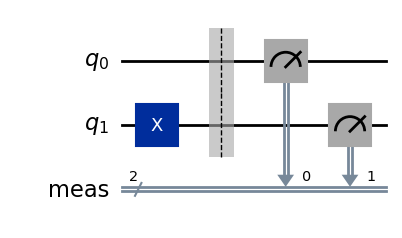

In [7]:
dos_qubits = QuantumCircuit(2) # Número de qubits
dos_qubits.x(1) # Se aplica al qubit de la izquierda
dos_qubits.measure_all()
dos_qubits.draw("mpl")

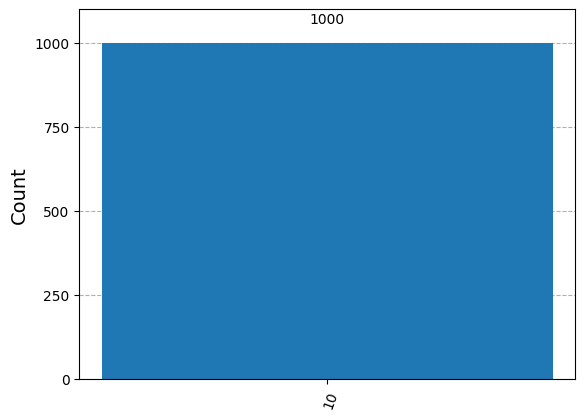

In [11]:
"""
Para circuitos cuánticos es necesario, además de cargar el circuito, poner un entorno
donde ejecutarse y el número de ejecuciones.
"""
job = backed.run(dos_qubits, shots=1000)

resultados = job.result() # Guarda resultados del circuito
counts = resultados.get_counts() # Realiza histograma
plot_histogram(counts)

<h3>Ejercicio 0</h3>

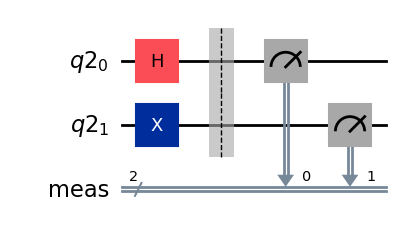

In [13]:
qr = QuantumRegister(2)
dos_qubits = QuantumCircuit(qr)
dos_qubits.h(0)
dos_qubits.x(1)
dos_qubits.measure_all()
dos_qubits.draw("mpl")

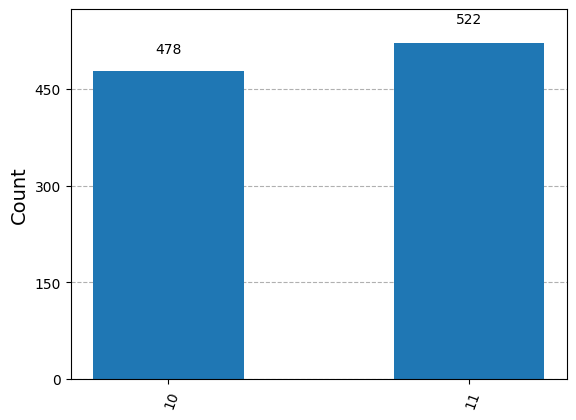

In [14]:
job = backed.run(dos_qubits, shots=1000)

resultados = job.result() # Guarda resultados del circuito
counts = resultados.get_counts() # Realiza histograma
plot_histogram(counts)

<h2>Compuertas importantes</h2>
<h3>CNOT</h3>

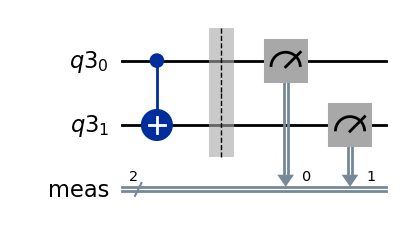

In [15]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)

"""
Primer parámetro: qubit de control
Segundo parámetro: qubit objetivo
"""
qc.cx(0, 1)

qc.measure_all()

qc.draw("mpl")

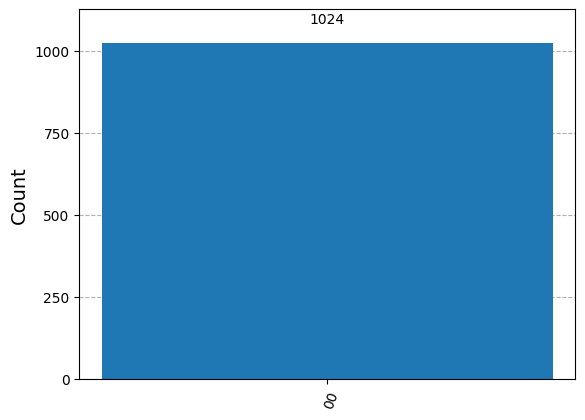

In [16]:
job = backed.run(qc, shots=1024)

resultados = job.result() # Guarda resultados del circuito
counts = resultados.get_counts() # Realiza histograma
plot_histogram(counts)

<h3>Ejercicio</h3>

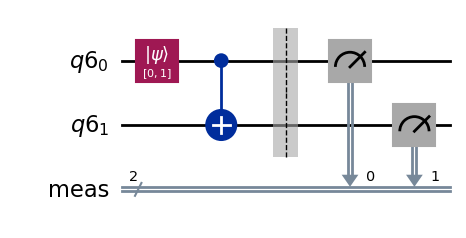

In [20]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)

# Primer qubit en el estado |1>
estado_inicial = [0, 1]

qc.initialize(estado_inicial, 0)

"""
Primer parámetro: qubit de control
Segundo parámetro: qubit objetivo
"""
qc.cx(0, 1)

qc.measure_all()

qc.draw("mpl")

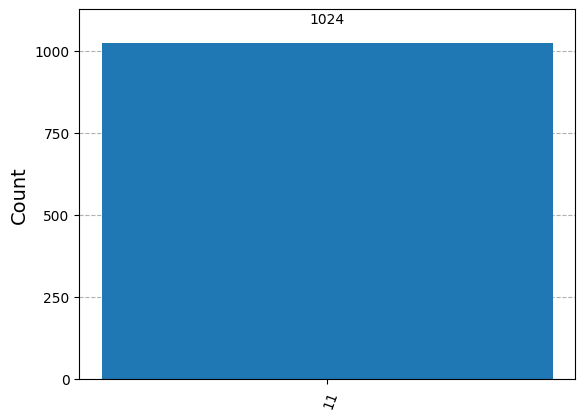

In [21]:
job = backed.run(qc, shots=1024)

resultados = job.result() # Guarda resultados del circuito
counts = resultados.get_counts() # Realiza histograma
plot_histogram(counts)

<h3>Ejercicio 1</h3>

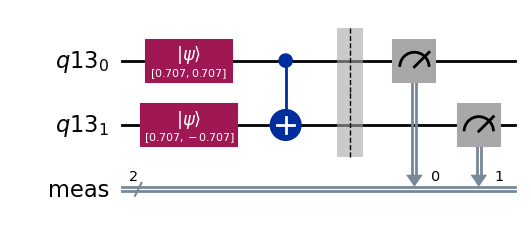

In [34]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)

# Estados iniciales
ei_1 = [1, 1]  # Estado +
ei_2 = [1, -1] # Estado 
ei_1 /= np.linalg.norm(ei_1)
ei_2 /= np.linalg.norm(ei_2)

# Inicializamos los qubits
qc.initialize(ei_1, 0)
qc.initialize(ei_2, 1)

# Aplicamos CNOT
qc.cx(0, 1)

qc.measure_all()

qc.draw("mpl")

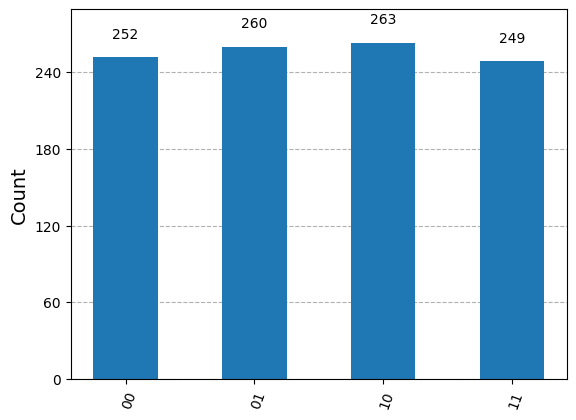

In [35]:
job = backed.run(qc, shots=1024)

resultados = job.result() # Guarda resultados del circuito
counts = resultados.get_counts() # Realiza histograma
plot_histogram(counts)

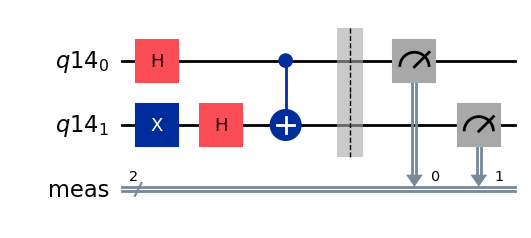

In [36]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)

# Estado +
qc.h(0)

# Estado -
qc.x(1) # |0> -> |1>
qc.h(1) # |->

# Aplicamos CNOT
qc.cx(0, 1)

qc.measure_all()

qc.draw("mpl")

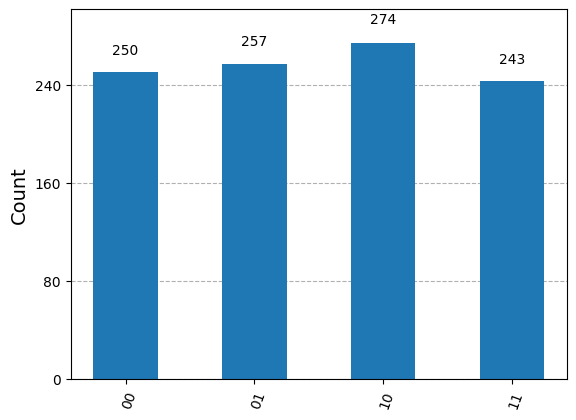

In [37]:
job = backed.run(qc, shots=1024)

resultados = job.result() # Guarda resultados del circuito
counts = resultados.get_counts() # Realiza histograma
plot_histogram(counts)